In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

# 1. Loading Data
file_path = "/content/unrestricted_hcp_freesurfer.csv"
df = pd.read_csv(file_path)

# Display dataset information before cleaning
print("Dataset Info Before Cleaning:")
print(df.info())
print("\nMissing values before handling:")
print(df.isnull().sum())

# Drop columns with excessive missing values (threshold = 30%)
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill remaining missing values with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Display dataset information after cleaning
print("\n------------------------------------------------------------------- ")
print("\nMissing values after handling:")
print(df.isnull().sum())
print("\nDataset Info After Cleaning:")
print(df.info())


Dataset Info Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 938 entries, Subject to FS_R_Insula_CurvInd
dtypes: float64(741), int64(195), object(2)
memory usage: 8.0+ MB
None

Missing values before handling:
Subject                            0
Gender                             0
Release                            0
FS_InterCranial_Vol                0
FS_BrainSeg_Vol                    0
                                  ..
FS_R_Supramarginal_CurvInd         0
FS_R_Frontalpole_CurvInd           0
FS_R_Temporalpole_CurvInd          0
FS_R_Transversetemporal_CurvInd    0
FS_R_Insula_CurvInd                0
Length: 938, dtype: int64

------------------------------------------------------------------- 

Missing values after handling:
Subject                            0
Gender                             0
Release                            0
FS_InterCranial_Vol                0
FS_BrainSeg_Vol                    0
                   

In [20]:
# Print the column names to inspect the actual columns
print("Columns in the dataset:")
print(df.columns)

# Convert categorical columns to numerical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes







Columns in the dataset:
Index(['Subject', 'Gender', 'Release', 'FS_InterCranial_Vol',
       'FS_BrainSeg_Vol', 'FS_BrainSeg_Vol_No_Vent',
       'FS_BrainSeg_Vol_No_Vent_Surf', 'FS_LCort_GM_Vol', 'FS_RCort_GM_Vol',
       'FS_TotCort_GM_Vol',
       ...
       'FS_R_Rostralanteriorcingulate_CurvInd',
       'FS_R_Rostralmiddlefrontal_CurvInd', 'FS_R_Superiorfrontal_CurvInd',
       'FS_R_Superiorparietal_CurvInd', 'FS_R_Superiortemporal_CurvInd',
       'FS_R_Supramarginal_CurvInd', 'FS_R_Frontalpole_CurvInd',
       'FS_R_Temporalpole_CurvInd', 'FS_R_Transversetemporal_CurvInd',
       'FS_R_Insula_CurvInd'],
      dtype='object', length=938)


In [21]:
# 2. Select Features (X) and Target (Y)
# Check the available columns and select the ones that exist
available_features = [
    'FS_LCort_GM_Vol', 'FS_RCort_GM_Vol', 'FS_TotCort_GM_Vol',
    'FS_LCort_GM_ThickAvg', 'FS_RCort_GM_ThickAvg',
    'FS_Hippocampus_Vol', 'FS_Amygdala_Vol', 'FS_Thalamus_Vol',
    'FS_L_Rostralanteriorcingulate_CurvInd', 'FS_R_Rostralanteriorcingulate_CurvInd',
    'FS_L_Superiorfrontal_CurvInd', 'FS_R_Superiorfrontal_CurvInd',
    'FS_L_Insula_CurvInd', 'FS_R_Insula_CurvInd'
]

# Filter features to only include those that are present in the dataset
features = [col for col in available_features if col in df.columns]
print("\n---------------------------------------------------------------------------------------------------------------------")
print(f"Using the following features: {features}")

# Check if the target column 'FS_Hippocampus_Vol' is available, otherwise select a different target
if 'FS_Hippocampus_Vol' in df.columns:
    Y = pd.qcut(df['FS_Hippocampus_Vol'], q=2, labels=[0, 1])
else:
    # If 'FS_Hippocampus_Vol' is not present, select a different column for the target
    #print("'FS_Hippocampus_Vol' not found. Please select a valid target column.")
    Y = pd.qcut(df['FS_TotCort_GM_Vol'], q=2, labels=[0, 1])  # Using 'FS_TotCort_GM_Vol' as an example

X = df[features]

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)






----------------------------------------------------------------------------------------------------
Using the following features: ['FS_LCort_GM_Vol', 'FS_RCort_GM_Vol', 'FS_TotCort_GM_Vol', 'FS_L_Rostralanteriorcingulate_CurvInd', 'FS_R_Rostralanteriorcingulate_CurvInd', 'FS_L_Superiorfrontal_CurvInd', 'FS_R_Superiorfrontal_CurvInd', 'FS_L_Insula_CurvInd', 'FS_R_Insula_CurvInd']


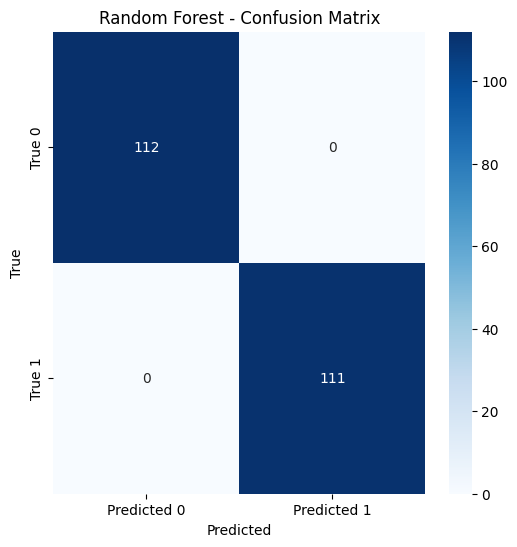

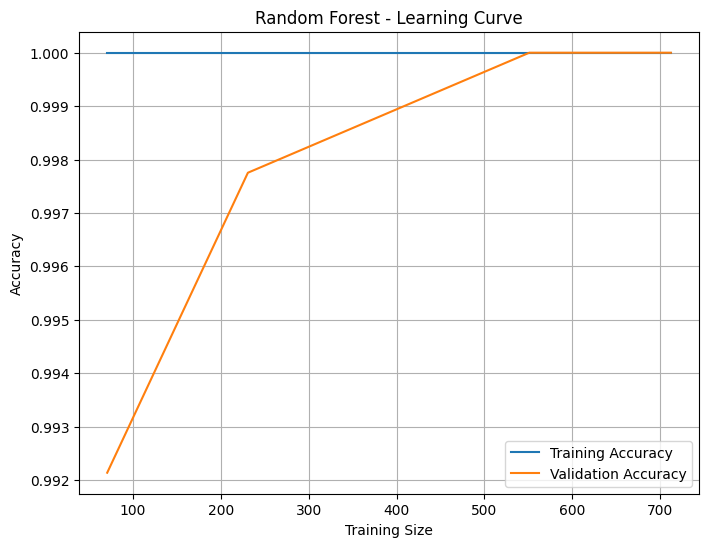



------------ Random Forest Classifier -----------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Error: 0.0000
R²: 1.0000


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix Plot Function
def plot_confusion_matrix(model, X_test, Y_test, model_name):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Learning Curve Plot Function
def plot_learning_curve(model, X_train, Y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy')
    plt.title(f'{model_name} - Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Stacked Bar Chart for Performance Comparison
def plot_stacked_bar_chart(results):
    labels = ['Random Forest', 'SVM', 'Logistic Regression']
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Collecting the metric values for each model
    values = np.array([
        [results['rf']['accuracy'], results['rf']['precision'], results['rf']['recall'], results['rf']['f1']],
        [results['svm']['accuracy'], results['svm']['precision'], results['svm']['recall'], results['svm']['f1']],
        [results['log_reg']['accuracy'], results['log_reg']['precision'], results['log_reg']['recall'], results['log_reg']['f1']]
    ])

    # Define distinct colors for each metric
    colors = ['#FFB6C1', '#FFDAB9', '#B0E0E6', '#E6E6FA', '#F5DEB3']



    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    bottom = np.zeros(len(labels))
    for i in range(len(metrics)):
        ax.bar(labels, values[:, i], label=metrics[i], color=colors[i], bottom=bottom)
        bottom += values[:, i]

    ax.set_ylabel('Performance Metrics')
    ax.set_title('Performance Comparison - Stacked Bar Chart')
    ax.legend(title='Metrics')
    plt.show()

# Models and Results Storage
results = {}


# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

# Store performance metrics
results['rf'] = {
    'accuracy': accuracy_score(Y_test, Y_pred_rf),
    'precision': precision_score(Y_test, Y_pred_rf),
    'recall': recall_score(Y_test, Y_pred_rf),
    'f1': f1_score(Y_test, Y_pred_rf)
}

# Plot confusion matrix and learning curve for Random Forest
print("\n")
plot_confusion_matrix(rf_model, X_test, Y_test, 'Random Forest')
print("\n")
plot_learning_curve(rf_model, X_train, Y_train, 'Random Forest')


# Random Forest Classifier detail
print("\n")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
print("------------ Random Forest Classifier -----------------")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rf):.4f}")
print(f"Precision: {precision_score(Y_test, Y_pred_rf):.4f}")
print(f"Recall: {recall_score(Y_test, Y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_rf):.4f}")
# RMSE is not applicable for classification tasks, so we remove it
# If you want classification error rate, you can calculate it as:
classification_error_rf = 1 - accuracy_score(Y_test, Y_pred_rf)
print(f"Classification Error: {classification_error_rf:.4f}")
print(f"R²: {r2_score(Y_test, Y_pred_rf):.4f}")


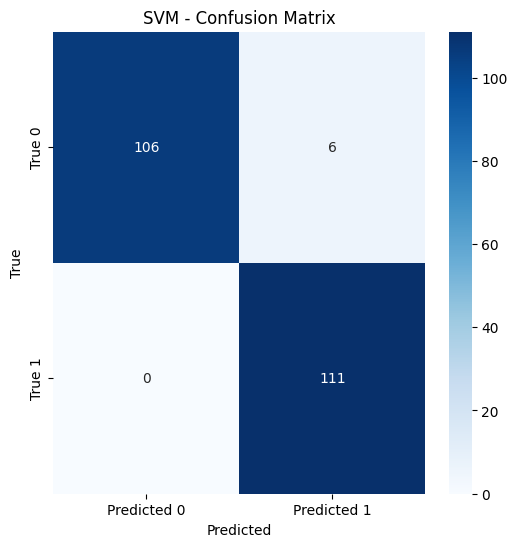

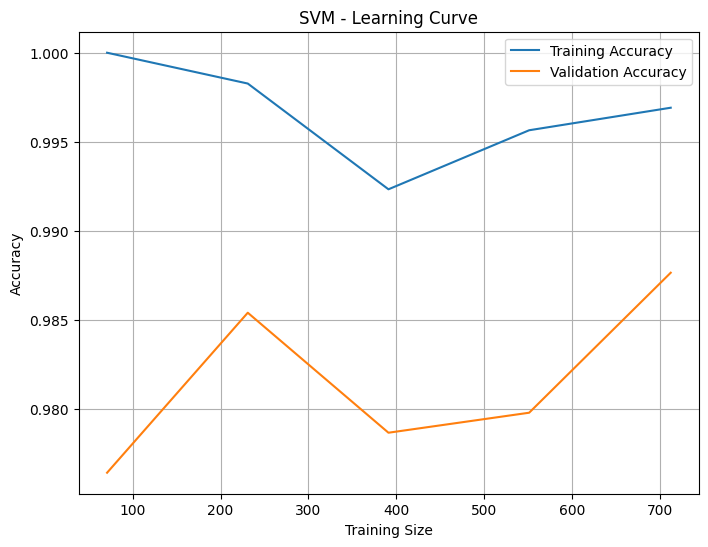



----------- Support Vector Machine (SVM) --------------
Accuracy: 0.9731
Precision: 0.9487
Recall: 1.0000
F1 Score: 0.9737
Classification Error: 0.0269
R²: 0.8924


In [39]:


# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)

# Store performance metrics
results['svm'] = {
    'accuracy': accuracy_score(Y_test, Y_pred_svm),
    'precision': precision_score(Y_test, Y_pred_svm),
    'recall': recall_score(Y_test, Y_pred_svm),
    'f1': f1_score(Y_test, Y_pred_svm)
}

# Plot confusion matrix and learning curve for SVM
print("\n")
plot_confusion_matrix(svm_model, X_test, Y_test, 'SVM')
print("\n")
plot_learning_curve(svm_model, X_train, Y_train, 'SVM')


# Support Vector Machine (SVM) detail
print("\n")
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)
print("----------- Support Vector Machine (SVM) --------------")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_svm):.4f}")
print(f"Precision: {precision_score(Y_test, Y_pred_svm):.4f}")
print(f"Recall: {recall_score(Y_test, Y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_svm):.4f}")
classification_error_svm = 1 - accuracy_score(Y_test, Y_pred_svm)
print(f"Classification Error: {classification_error_svm:.4f}")
print(f"R²: {r2_score(Y_test, Y_pred_svm):.4f}")


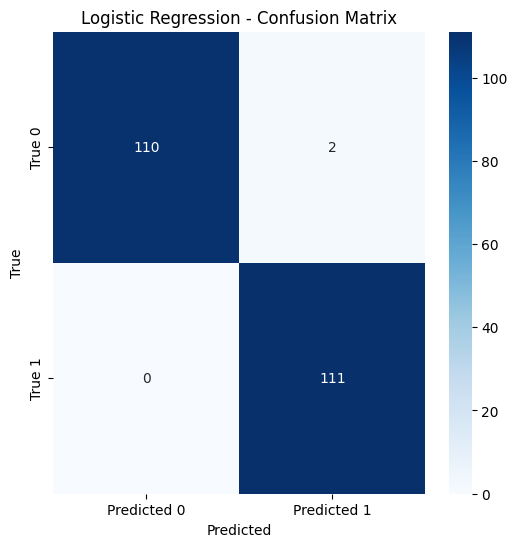

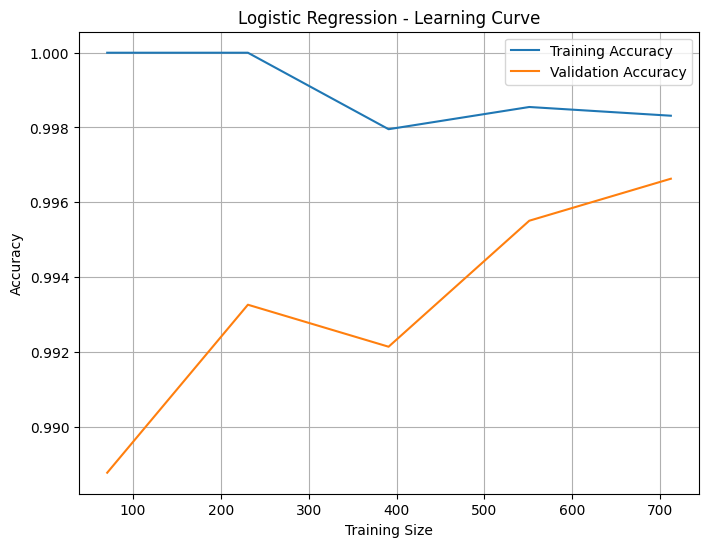



--------- Logistic Regression -----------
Accuracy: 0.9910
Precision: 0.9823
Recall: 1.0000
F1 Score: 0.9911
Classification Error: 0.0090
R²: 0.9641


In [40]:
# 3. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred_log = log_reg.predict(X_test)

# Store performance metrics
results['log_reg'] = {
    'accuracy': accuracy_score(Y_test, Y_pred_log),
    'precision': precision_score(Y_test, Y_pred_log),
    'recall': recall_score(Y_test, Y_pred_log),
    'f1': f1_score(Y_test, Y_pred_log)
}

# Plot confusion matrix and learning curve for Logistic Regression
print("\n")
plot_confusion_matrix(log_reg, X_test, Y_test, 'Logistic Regression')
print("\n")
plot_learning_curve(log_reg, X_train, Y_train, 'Logistic Regression')

# Logistic Regression detail
print("\n")
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred_log = log_reg.predict(X_test)
print("--------- Logistic Regression -----------")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_log):.4f}")
print(f"Precision: {precision_score(Y_test, Y_pred_log):.4f}")
print(f"Recall: {recall_score(Y_test, Y_pred_log):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_log):.4f}")
classification_error_log = 1 - accuracy_score(Y_test, Y_pred_log)
print(f"Classification Error: {classification_error_log:.4f}")
print(f"R²: {r2_score(Y_test, Y_pred_log):.4f}")



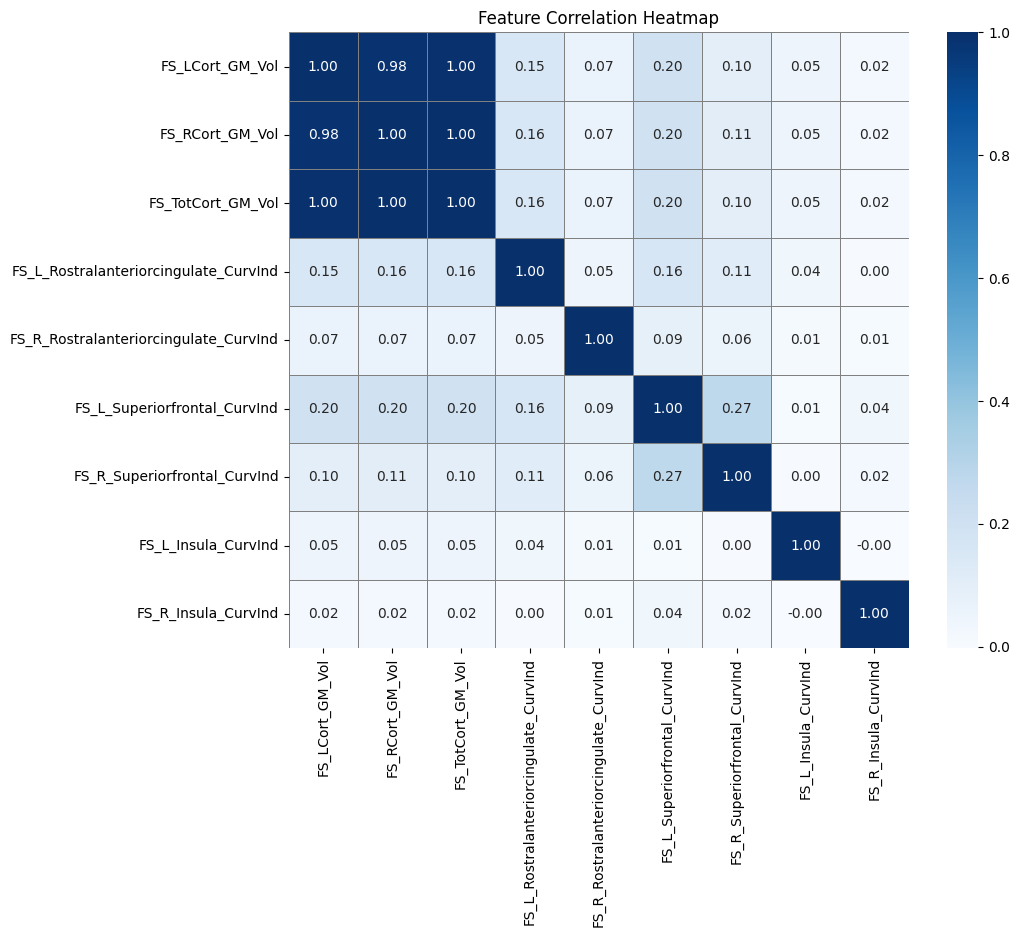

In [41]:
# 3. Feature Selection and Engineering
plt.figure(figsize=(10, 8))
sns.heatmap(feature_correlation, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Feature Correlation Heatmap")
plt.show()

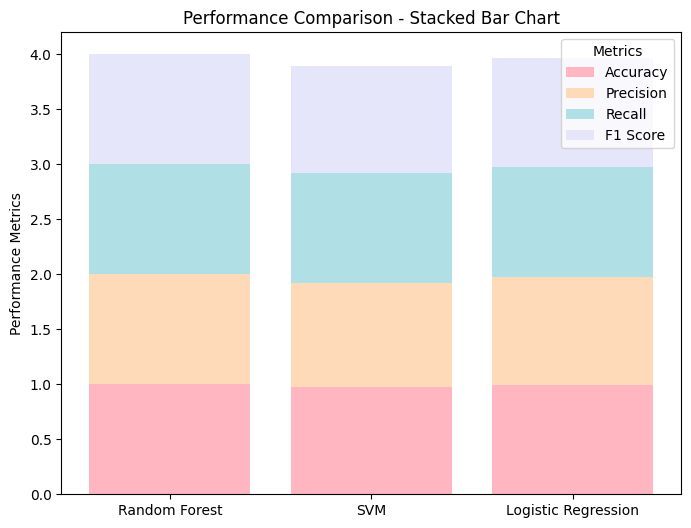

In [42]:
# 4. Plot Stacked Bar Chart for Performance Comparison
plot_stacked_bar_chart(results)
